In [4]:
import matplotlib.pyplot as plt
import scipy
from tqdm.notebook import tqdm
from scipy.optimize import fmin, minimize, root_scalar

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from integrals import *

In [6]:
p = 5
n_points_m = 500
n_points_T = 50

T_kauz, T_dyn = 0.60695, 0.7001

In [7]:
# to be changed
Teqs = np.hstack((np.linspace(T_kauz, T_dyn, n_points_T - 1), np.array([(n_points_T * T_dyn -T_kauz) / (n_points_T - 1),])))

es = -1 / (2 * Teqs)

In [8]:
ms = np.linspace(0.0, 0.99, n_points_m)

data = observables((len(Teqs), n_points_m))

for jdx, e in enumerate(tqdm(es)):
    for idx, m in enumerate(ms):
        h, q = fixed_points_h_q(m, e, p)

        data['q'][jdx, idx] = q
        data['h'][jdx, idx] = h
        data['T'][jdx, idx] = 1 / beta_q_e(q, m, e, p)
        data['delta_f'][jdx, idx] = deltaf_FP(m, q, h, p, e)
        data['s'][jdx, idx] = s_FP(m, q, h, p, e)
        data['dAT'][jdx, idx] = dAT_condition(
            q, m, h, beta_q_e(q, m, e, p), beta_q_e(q, m, e, p) / 2, p
        )

  0%|          | 0/50 [00:00<?, ?it/s]

(19228,)
(50, 500)


Text(0.5, 0.92, 's(m,e) p = 5')

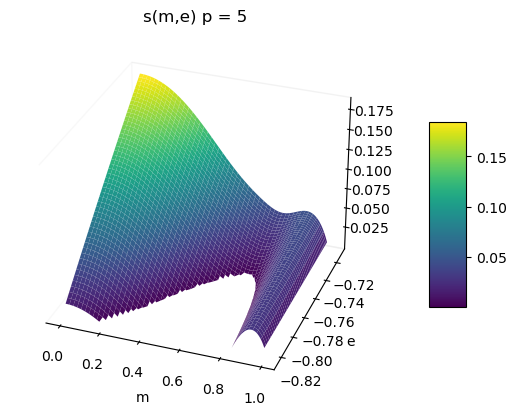

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.view_init(30, -70)

m_mesh, es_mesh = np.meshgrid(ms, es)
# z = np.zeros_like(m_mesh)

positive_idx = data['s'] > 0
print(data['s'][positive_idx].shape)
print(np.where(positive_idx, data['s'], np.nan).shape)

surf = ax.plot_surface(np.where(positive_idx, m_mesh, np.nan), np.where(positive_idx, es_mesh, np.nan), np.where(positive_idx, data['s'], np.nan), cmap="viridis", edgecolor="none")
# ax.plot_surface(m_mesh, es_mesh, z, color="black", alpha=0.5, edgecolor="none")

ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.1)

ax.set_xlabel("m")
ax.set_ylabel("e")
ax.set_title(f"s(m,e) p = {p:d}")

Text(0, 0.5, 'e')

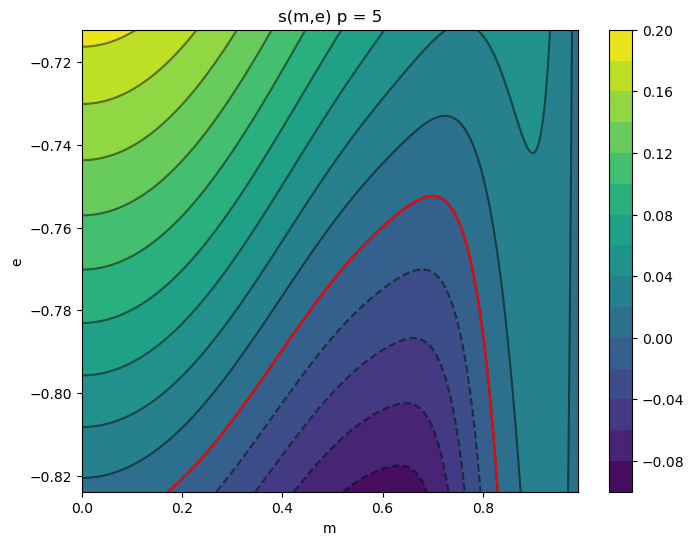

In [11]:
num_levels = 15

plt.figure(figsize=(8, 6))

# Create a filled contour plot
c1 = plt.contourf(m_mesh, es_mesh, data['s'], cmap="viridis", levels=num_levels)
cbar = plt.colorbar(c1)  # Optional: Add a colorbar

# Overlay a contour plot with black lines
plt.contour(m_mesh, es_mesh, data['s'], colors="black", levels=num_levels, alpha=0.5)

plt.contour(m_mesh, es_mesh, data['s'], levels=[0], colors='red')

zmin, zmax = data['s'].min(), data['s'].max()
position = (0 - zmin) / (zmax - zmin)

# Draw the line
cbar.ax.axhline(position, color='red')

# Add titles and labels
plt.title(f"s(m,e) p = {p:d}")
plt.xlabel("m")
plt.ylabel("e")